In [1]:
import numpy as np
from scipy.io.wavfile import write, read
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib import pyplot as mplot

import IPython.display as ipd

### Raw data

https://commons.wikimedia.org/wiki/File:Hello_world_said_by_eSpeakNG.ogg

In [2]:
rawData = 'resources/audio/original/Hello_world_said_by_eSpeakNG.wav'

originalSampleRate, originalWaveForm = read(rawData)
print('length of original recording = %.2f secs' % (originalWaveForm.shape[0] / originalSampleRate))
print(originalWaveForm.shape)

ipd.Audio(rawData)

length of original recording = 0.90 secs
(19840,)


### Downsample and select relevant data

In [3]:
downData = 'resources/audio/original/downsampled.Hello_world_said_by_eSpeakNG.wav'

downSample = 2
sampleRate = int(originalSampleRate / downSample)

waveForm = originalWaveForm[::downSample]
waveForm = waveForm[500:6200]

numbPoints = waveForm.shape[0]
print(numbPoints)

write(downData, sampleRate, waveForm)
ipd.Audio(downData)

5700


### Optional: *Visualize original audio data*

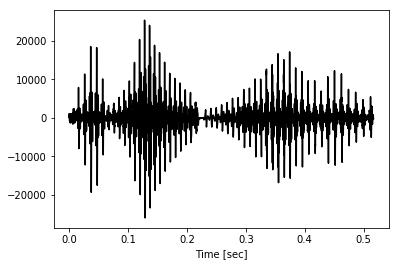

In [4]:
plt.plot(np.array(range(numbPoints)) / sampleRate, waveForm, color='black')
plt.xlabel('Time [sec]');

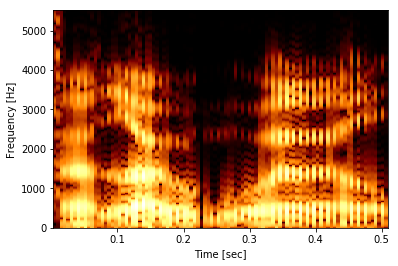

In [5]:
sample_rate, samples = read(downData)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate, nperseg=65, nfft=2048)
plt.pcolormesh(times, frequencies, np.log10(spectrogram + 1), cmap='afmhot')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, int(sampleRate / 2)]);

## Find value of $\alpha$ to fit the original waveform

In [6]:
# use tau = 12

from helperFunctions import *
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = waveForm.reshape(-1, 1)

data = data.astype('float64')

In [8]:
normalizerModel = MinMaxScaler().fit(data)
normalizedData = normalizerModel.transform(data)

In [9]:
normalizedData.shape

(5700, 1)

### Find initial condition

In [10]:
t1 = datetime.datetime.now()
decimalInitial = findInitialCondition(normalizedData)
t2 = datetime.datetime.now()
print((t2 - t1).total_seconds())

significance = 68400 bits ; 20589 digits (base-10) ; ratio = 3.322

94.119314


In [11]:
decimalInitial

mpf('0.509396251169351937308874379874601609867439478197774298424824829413289626378570379889230681389532696088888719563319937066277932516481801426570946580534989051223847489495356896326199074311620953882012407670471783818066840279489035913887296182943015971767471597884954063508157673514582484473352212633321206469873792264214504879346265872829364550648316262997898115474442022776424894825780645172905708434094149394738194666576706762350355982582276095178200393610686739130781557570677594545427154053132835629086392343838209827998125341900867324262623770792615371857782789776496144197756170502751303754088677448969012907899860825052292077275357758021201198235135845860077186157351656286706260213849691312249256332281489471803609814736710700402765412891798238578784696917343361485563641814218900899564360998425242171015809700261374436928885109611339600921580421157435579258381125898898380521453967749147008492501943047110628768878351244789347856880442620286666720733154337995266067501049105652564658454

In [12]:
len(str(decimalInitial))

20591

### Generate wave form from initial condition

In [13]:
t1 = datetime.datetime.now()
decodedValues = generateData(decimalInitial, len(normalizedData))
t2 = datetime.datetime.now()
print((t2 - t1).total_seconds())

705.107351


### Verify error bounds

In [14]:
maxExpectedError = np.pi / 2 ** (tau - 1)

max([abs(x - y) / maxExpectedError for x, y in zip(decodedValues, normalizedData[:,0])])

0.8837180482819718

### Investigate generated values

In [15]:
saveResultsName = 'resources/audio/generated/HelloWorld_generated.wav'

In [16]:
write(saveResultsName, sampleRate, np.array(decodedValues))

In [17]:
ipd.Audio(saveResultsName)

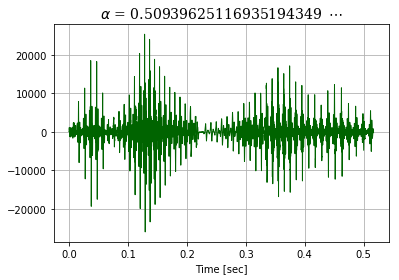

In [18]:
plt.plot(np.array(range(numbPoints)) / sample_rate, samples, color='darkgreen', linewidth=1)
plt.xlabel('Time [sec]')
plt.title(r'$\alpha$ = %.20f $\, \cdots$' % float(decimalInitial), {'size': 14, 'fontname':'serif'});
plt.grid()

mplot.savefig('resources/audio/generated/generated_waveform.png', bbox_inches='tight')

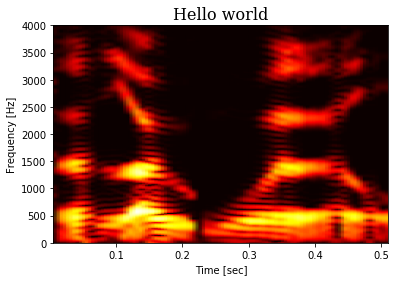

In [19]:
sample_rate, samples = read(saveResultsName)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate, nperseg=120, nfft=8192)
plt.pcolormesh(times, frequencies, np.log10(spectrogram + 1e-7), cmap='hot', shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(r'Hello world', {'size': 16, 'fontname':'serif'});
plt.ylim([0, 4000]);

mplot.savefig('resources/audio/generated/generated_spectrogram.png', bbox_inches='tight')